In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dataset_name = 'wine'


additional_taxonomy = None


if dataset_name == 'adult':
    from import_process_dataset import import_process_adult, train_classifier_kv

    df, class_map, continuous_attributes = import_process_adult()

    df_analyze = train_classifier_kv(df, encoding = True)
    

elif dataset_name == "compas":
    from import_process_dataset import import_compas

    df_analyze, class_map, continuous_attributes = import_compas()


    
elif dataset_name == 'wine':
    from import_process_dataset import import_process_wine, train_classifier_kv

    df, class_map, continuous_attributes = import_process_wine()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df)
    
elif dataset_name == 'online_shoppers_intention':
    from import_process_dataset import import_process_online_shoppers_intention, train_classifier_kv

    df, class_map, continuous_attributes = import_process_online_shoppers_intention()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df, encoding=True)
    
elif dataset_name == "folkstables":
        from import_process_dataset import import_folkstables

        (
            df_analyze,
            target,
            continuous_attributes,
        ) = import_folkstables()

        import json
        import os

        with open(
            os.path.join(
                os.path.curdir, "datasets", "ACSPUMS", "adult_taxonomies.json"
            ),
            "r",
        ) as fp:
            additional_taxonomy = json.load(fp)

In [7]:
# # Tree divergence

true_class_name = "class"
pred_class_name = "predicted"
cols_c = [true_class_name, pred_class_name]
metric = 'd_error'


type_criterion="divergence_criterion"
type_experiment = "one_at_time"
min_support_tree = 0.1

import time

for i in range(5):
    start_time = time.time()
    if metric == 'd_outcome':
        from tree_discretization_ranking import TreeDiscretization_ranking

        tree_discr = TreeDiscretization_ranking()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            continuous_attributes=list(continuous_attributes),
            type_criterion=type_criterion,
            storeTree=True,
            target_col=target
        )
    else:
        from tree_discretization import TreeDiscretization

        tree_discr = TreeDiscretization()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            class_map=class_map,
            continuous_attributes=list(continuous_attributes),
            class_and_pred_names=cols_c,
            storeTree=True,
            type_criterion=type_criterion
        )

    print(time.time()-start_time)

0.6575875282287598
0.659186840057373
0.6604189872741699
0.6663751602172852
0.6624417304992676


In [9]:
dataset_name = 'online_shoppers_intention'


additional_taxonomy = None


if dataset_name == 'adult':
    from import_process_dataset import import_process_adult, train_classifier_kv

    df, class_map, continuous_attributes = import_process_adult()

    df_analyze = train_classifier_kv(df, encoding = True)
    

elif dataset_name == "compas":
    from import_process_dataset import import_compas

    df_analyze, class_map, continuous_attributes = import_compas()


    
elif dataset_name == 'wine':
    from import_process_dataset import import_process_wine, train_classifier_kv

    df, class_map, continuous_attributes = import_process_wine()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df)
    
elif dataset_name == 'online_shoppers_intention':
    from import_process_dataset import import_process_online_shoppers_intention, train_classifier_kv

    df, class_map, continuous_attributes = import_process_online_shoppers_intention()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df, encoding=True)
    
elif dataset_name == "folkstables":
        from import_process_dataset import import_folkstables

        (
            df_analyze,
            target,
            continuous_attributes,
        ) = import_folkstables()

        import json
        import os

        with open(
            os.path.join(
                os.path.curdir, "datasets", "ACSPUMS", "adult_taxonomies.json"
            ),
            "r",
        ) as fp:
            additional_taxonomy = json.load(fp)

In [10]:
# # Tree divergence

true_class_name = "class"
pred_class_name = "predicted"
cols_c = [true_class_name, pred_class_name]
metric = 'd_error'


type_criterion="divergence_criterion"
type_experiment = "one_at_time"
min_support_tree = 0.1

import time

for i in range(5):
    start_time = time.time()
    if metric == 'd_outcome':
        from tree_discretization_ranking import TreeDiscretization_ranking

        tree_discr = TreeDiscretization_ranking()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            continuous_attributes=list(continuous_attributes),
            type_criterion=type_criterion,
            storeTree=True,
            target_col=target
        )
    else:
        from tree_discretization import TreeDiscretization

        tree_discr = TreeDiscretization()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            class_map=class_map,
            continuous_attributes=list(continuous_attributes),
            class_and_pred_names=cols_c,
            storeTree=True,
            type_criterion=type_criterion
        )

    print(time.time()-start_time)

6.771568775177002
6.842730283737183
6.820467233657837
6.887293100357056
6.891126871109009


In [11]:
tree_discr.printDiscretizationTrees(round_v = 2)

Administrative
 root s=1.00 --> d_error=0.00
         Administrative<=0 s=0.47 --> d_error=-0.06
         Administrative>=1 s=0.53 --> d_error=0.05
                 Administrative<=5 s=0.38 --> d_error=0.03
                         Administrative<=3 s=0.27 --> d_error=0.02
                                 Administrative<=1 s=0.11 --> d_error=0.02
                                 Administrative>=2 s=0.16 --> d_error=0.03
                         Administrative>=4 s=0.11 --> d_error=0.04
                 Administrative>=6 s=0.15 --> d_error=0.12

Administrative_Duration
 root s=1.00 --> d_error=0.00
         Administrative_Duration<=11.33333333 s=0.51 --> d_error=-0.05
         Administrative_Duration>=11.42857143 s=0.49 --> d_error=0.06
                 Administrative_Duration<=132.05 s=0.30 --> d_error=0.04
                         Administrative_Duration<=46.61111111 s=0.12 --> d_error=0.05
                         Administrative_Duration>=46.8 s=0.18 --> d_error=0.03
                

In [10]:
if additional_taxonomy is not None:
    generalization_dict.update(additional_taxonomy)

In [11]:
from divexplorer_generalized.FP_DivergenceExplorer import prune_categorical 
cols = [true_class_name, pred_class_name]
attributes = [a for a in df_analyze.columns if a not in cols] 
categorical_attributes = [a for a in attributes if a not in continuous_attributes]



In [12]:

out_support = {}
out_time = {}
out_fp = {}





In [13]:
min_sup_divergences = [0.01, 0.02, 0.03, 0.04, 0.05]
#min_sup_divergences = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]




In [64]:
# # Extract patterns
pruning_time_dict = {}

output_divergences = {}

out_patterns = {}

import time

for apply_generalization in [False, True]:
    type_gen = 'generalized' if apply_generalization else 'base'
    print(type_gen)
    for top_k in [None]: #1000
        top_k_str = '' if top_k is None else f'_top_{top_k}'
        print(top_k_str)
        for keep in [True, False]:
            if keep:
                pruning_start_time = time.time()
                keep_items = tree_discr.get_keep_items_associated_with_divergence()
                keep_items_cat = prune_categorical(df_analyze, categorical_attributes, metric, true_class_name = true_class_name, pred_class_name = pred_class_name, class_map = class_map)
                keep_items.update(keep_items_cat)
                pruning_time = time.time()-pruning_start_time
                keep_str = "_pruned"
            else:
                keep_items = None
                keep_str = ""
                pruning_time = 0
            print(keep_str)
            print(keep_items)
            for min_sup_divergence in min_sup_divergences:
                print(min_sup_divergence, end = " ")
                s_time = time.time()

                if metric == 'd_outcome':
                    from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                    FP_fm = extract_divergence_generalized(
                    df_analyze,
                    discretizations,
                    generalization_dict,
                    continuous_attributes,
                    min_sup_divergence=min_sup_divergence,
                    apply_generalization=apply_generalization,
                    target_name=target,
                    metrics_divergence = [metric],
                    FPM_type="fpgrowth",
                    save_in_progress = False, 
                    keep_only_positive_divergent_items=keep_items,
                    take_top_k=top_k,
                    metric_top_k=metric
                    
                    )
                else:

                    from utils_extract_divergence_generalized import  extract_divergence_generalized
                    FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k,
                        metric_top_k=metric
                    )

                key = type_gen + keep_str + top_k_str
                output_divergences[key] = FP_fm

                out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time

                print(f"({(time.time()-s_time):.2f})")

                most_divergent = max(FP_fm[metric])

                out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)

                pruning_time_dict.setdefault(min_sup_divergence, {})[key] = pruning_time
                out_patterns.setdefault(min_sup_divergence, {})[key] = FP_fm

base

_pruned
{'age': ['>=31', '[31-38]', '[31-34]', '[35-38]', '>=39', '[39-54]', '[39-46]', '[47-54]', '>=55'], 'hours-per-week': ['>=41', '[41-53]', '>=54'], 'workclass': ['Federal-gov', 'Local-gov', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'], 'education': ['Associates', 'Bachelors', 'Doctorate', 'Masters', 'Prof-School'], 'marital-status': ['Married'], 'occupation': ['Other', 'Professional', 'Sales', 'White-Collar'], 'relationship': ['Husband', 'Wife'], 'race': ['Asian-Pac-Islander', 'White'], 'sex': ['Male']}
0.01 (0.60)
0.02 (0.57)
0.03 (0.56)
0.04 (0.54)
0.05 (0.53)

None
0.01 (1.86)
0.02 (1.39)
0.03 (1.24)
0.04 (1.18)
0.05 (1.13)
generalized

_pruned
{'age': ['>=31', '[31-38]', '[31-34]', '[35-38]', '>=39', '[39-54]', '[39-46]', '[47-54]', '>=55'], 'hours-per-week': ['>=41', '[41-53]', '>=54'], 'workclass': ['Federal-gov', 'Local-gov', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'], 'education': ['Associates', 'Bachelors', 'Doctorate', 'Masters', 'Prof-School'], 'marita

In [65]:
output_dir = 'output_tmp'
saveFig = False

from run_pruned_v2 import get_predefined_color_labels, abbreviateValue

save = False

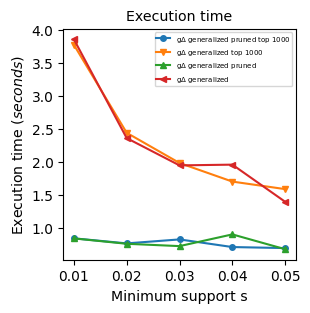

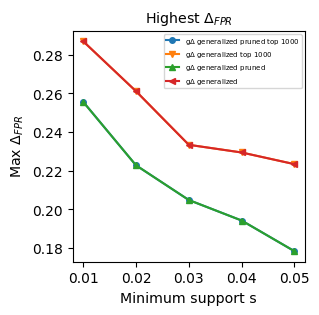

In [66]:


import os
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", "output_performance")

if saveFig:


    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)


abbreviations = {"one_at_time":"indiv t.", \
         "divergence_criterion":"g$\\Delta$", "entropy":"entr"}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})



from utils_plot import plotDicts



info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]


size_fig = (3,3)


info_i = "time"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")




plotDicts(info_plot, marker=True, \
        title = 'Execution time', sizeFig=size_fig,\
            #    linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name)


# ## Plot max_fpr





info_plot = {}
for sup in sorted(out_support.keys()):
    for type_gen in out_support[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_support[sup][type_gen]


size_fig = (3,3)


info_i = f"max_{metric}"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")


plotDicts(info_plot, marker=True, \
        title="Highest $\\Delta_{FPR}$" , sizeFig=size_fig,
            # linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Max $\\Delta_{FPR}$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name) #yscale="log",  



# # Store performance results

if save:
    import os

    output_results = os.path.join(os.path.curdir, output_dir, 'performance')
    from pathlib import Path

    Path(output_results).mkdir(parents=True, exist_ok=True)

    conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}"

    import json
    with open(os.path.join(output_results, f'{conf_name}_time.json'), 'w') as output_file:
        output_file.write(json.dumps(out_time))


    import json
    with open(os.path.join(output_results, f'{conf_name}_fp.json'), 'w') as output_file:
        output_file.write(json.dumps(out_fp))


    out_support_max = {}


    for sup in sorted(out_support.keys()):
        out_support_max[sup] = {}
        for type_gen in out_support[sup]:
            out_support_max[sup][type_gen] = out_support[sup][type_gen]

    with open(os.path.join(output_results, f'{conf_name}_div.json'), 'w') as output_file:
        output_file.write(json.dumps(out_support_max))




In [67]:
pruning_time_dict

{0.01: {'base_pruned': 0.15886545181274414,
  'base': 0,
  'generalized_pruned': 0.14263534545898438,
  'generalized': 0},
 0.02: {'base_pruned': 0.15886545181274414,
  'base': 0,
  'generalized_pruned': 0.14263534545898438,
  'generalized': 0},
 0.03: {'base_pruned': 0.15886545181274414,
  'base': 0,
  'generalized_pruned': 0.14263534545898438,
  'generalized': 0},
 0.04: {'base_pruned': 0.15886545181274414,
  'base': 0,
  'generalized_pruned': 0.14263534545898438,
  'generalized': 0},
 0.05: {'base_pruned': 0.15886545181274414,
  'base': 0,
  'generalized_pruned': 0.14263534545898438,
  'generalized': 0}}

In [69]:


import os
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", "output_performance")

if saveFig:


    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)


abbreviations = {"one_at_time":"indiv t.", \
         "divergence_criterion":"g$\\Delta$", "entropy":"entr"}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})



from utils_plot import plotDicts



info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
            info_plot[type_gen_str+"_pt"] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]
        info_plot[type_gen_str+"_pt"][sup] = out_time[sup][type_gen]+pruning_time_dict[sup][type_gen]



size_fig = (3,3)


info_i = "time"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")




plotDicts(info_plot, marker=True, \
        title = 'Execution time', sizeFig=size_fig,\
            #    linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name)


# ## Plot max_fpr





info_plot = {}
for sup in sorted(out_support.keys()):
    for type_gen in out_support[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_support[sup][type_gen]


size_fig = (3,3)


info_i = f"max_{metric}"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")


plotDicts(info_plot, marker=True, \
        title="Highest $\\Delta_{FPR}$" , sizeFig=size_fig,
            # linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Max $\\Delta_{FPR}$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name) #yscale="log",  



# # Store performance results

if save:
    import os

    output_results = os.path.join(os.path.curdir, output_dir, 'performance')
    from pathlib import Path

    Path(output_results).mkdir(parents=True, exist_ok=True)

    conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}"

    import json
    with open(os.path.join(output_results, f'{conf_name}_time.json'), 'w') as output_file:
        output_file.write(json.dumps(out_time))


    import json
    with open(os.path.join(output_results, f'{conf_name}_fp.json'), 'w') as output_file:
        output_file.write(json.dumps(out_fp))


    out_support_max = {}


    for sup in sorted(out_support.keys()):
        out_support_max[sup] = {}
        for type_gen in out_support[sup]:
            out_support_max[sup][type_gen] = out_support[sup][type_gen]

    with open(os.path.join(output_results, f'{conf_name}_div.json'), 'w') as output_file:
        output_file.write(json.dumps(out_support_max))




KeyError: 'generalized_pruned_top_1000'

In [70]:
list(out_patterns[0.05]['generalized_pruned'].sort_values(metric, ascending = False).head(1).itemsets)[0]

frozenset({'marital-status=Married', 'occupation=Sales', 'race=White'})

In [72]:
d = out_patterns[0.05]['generalized']

d1 = d.loc[d['length']==1]

In [78]:
itemset = list(out_patterns[0.05]['generalized'].sort_values(metric, ascending = False).head(1).itemsets)[0]
itemset

frozenset({'age=[39-54]',
           'education=High School grad',
           'race=White',
           'relationship=Husband',
           'sex=Male',
           'workclass=Private'})

In [79]:
d = out_patterns[0.05]['generalized']

def check_item(x, item):
    if item in x:
            return True
    return False


d1 = d.loc[d['length']==1]
for item in itemset:
    display(d1.loc[d1['itemsets'].apply(lambda x: check_item(x, item))])

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
5,0.675048,(sex=Male),18717,2271,3458,6081,1,30527.0,0.18767,0.03635,12.989054


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
2,0.736522,(workclass=Private),24364,1692,2861,4390,1,33307.0,0.136698,-0.014622,5.784999


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
10,0.545796,(education=High School grad),19067,1209,2367,2039,1,24682.0,0.144883,-0.006437,2.291383


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
1,0.860267,(race=White),26280,2416,3784,6423,1,38903.0,0.159371,0.008051,3.212436


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
53,0.334152,(age=[39-54]),7991,1346,1911,3863,1,15111.0,0.215538,0.064218,17.151605


,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
27,0.412764,(relationship=Husband),8062,2097,2863,5644,1,18666.0,0.265724,0.114404,31.382331


In [83]:
from divexplorer_generalized.FP_Divergence

FP_Divergence(FP_fm)

SyntaxError: invalid syntax (2776527641.py, line 1)

In [81]:
keep_items = tree_discr.get_keep_items_associated_with_divergence()
keep_items_cat = prune_categorical(df_analyze, categorical_attributes, metric, true_class_name = true_class_name, pred_class_name = pred_class_name, class_map = class_map)
keep_items.update(keep_items_cat)

In [82]:
keep_items

{'age': ['>=31',
  '[31-38]',
  '[31-34]',
  '[35-38]',
  '>=39',
  '[39-54]',
  '[39-46]',
  '[47-54]',
  '>=55'],
 'hours-per-week': ['>=41', '[41-53]', '>=54'],
 'workclass': ['Federal-gov',
  'Local-gov',
  'Self-emp-inc',
  'Self-emp-not-inc',
  'State-gov'],
 'education': ['Associates',
  'Bachelors',
  'Doctorate',
  'Masters',
  'Prof-School'],
 'marital-status': ['Married'],
 'occupation': ['Other', 'Professional', 'Sales', 'White-Collar'],
 'relationship': ['Husband', 'Wife'],
 'race': ['Asian-Pac-Islander', 'White'],
 'sex': ['Male']}

In [76]:
list(out_patterns[0.05]['generalized_pruned'].sort_values(metric, ascending = False).head(1).itemsets)[0]

frozenset({'marital-status=Married', 'occupation=Sales', 'race=White'})

In [148]:
import pandas as pd

pd.DataFrame(info_plot).T.describe()

,0.01,0.02,0.03,0.04,0.05
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.287342,0.212456,0.191557,0.187625,0.174928
std,0.011580,0.006039,0.005561,0.000000,0.000000
min,0.279154,0.208186,0.187625,0.187625,0.174928
25%,0.283248,0.210321,0.189591,0.187625,0.174928
50%,0.287342,0.212456,0.191557,0.187625,0.174928
75%,0.291436,0.214591,0.193524,0.187625,0.174928
max,0.295531,0.216726,0.195490,0.187625,0.174928


In [149]:
keep_items

In [23]:

info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        if 'base' in type_gen:
            continue
        if "pruned" in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]



        
pd.DataFrame(info_plot).T.describe()

,0.005,0.010,0.020,0.030,0.040,0.050,0.075,0.100,0.150,0.200
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,7.788011,5.059128,3.259035,2.617630,2.268267,2.100610,1.762395,1.593206,1.224766,1.102986
std,0.139842,0.008691,0.026224,0.007412,0.000252,0.020278,0.017289,0.016689,0.000730,0.007631
min,7.689128,5.052983,3.240492,2.612389,2.268089,2.086271,1.750169,1.581405,1.224250,1.097590
25%,7.738570,5.056056,3.249763,2.615009,2.268178,2.093441,1.756282,1.587305,1.224508,1.100288
50%,7.788011,5.059128,3.259035,2.617630,2.268267,2.100610,1.762395,1.593206,1.224766,1.102986
75%,7.837453,5.062201,3.268307,2.620250,2.268356,2.107779,1.768507,1.599106,1.225024,1.105684
max,7.886894,5.065273,3.277579,2.622871,2.268445,2.114949,1.774620,1.605007,1.225282,1.108382


In [7]:
# # Extract patterns



import time

for apply_generalization in [False, True]:
    type_gen = 'generalized' if apply_generalization else 'base'
    print(type_gen)
    for top_k in [None, 1000]:
        top_k_str = '' if top_k is None else f'_top_{top_k}'
        print(top_k_str)
        for keep in [False, True]:
            if keep:
                keep_items = tree_discr.get_keep_items_associated_with_divergence()
                keep_str = "_pruned"
            else:
                keep_items = None
                keep_str = ""
            print(keep_str)
            for min_sup_divergence in min_sup_divergences:
                print(min_sup_divergence, end = " ")
                s_time = time.time()

                if metric == 'd_outcome':
                    from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                    FP_fm = extract_divergence_generalized(
                    df_analyze,
                    discretizations,
                    generalization_dict,
                    continuous_attributes,
                    min_sup_divergence=min_sup_divergence,
                    apply_generalization=apply_generalization,
                    target_name=target,
                    metrics_divergence = [metric],
                    FPM_type="fpgrowth",
                    save_in_progress = False, 
                    keep_only_positive_divergent_items=keep_items,
                    
                    )
                else:

                    from utils_extract_divergence_generalized import  extract_divergence_generalized
                    FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k
                    )

                key = type_gen + keep_str + top_k_str

                out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time

                print(f"({(time.time()-s_time):.2f})")

                most_divergent = max(FP_fm[metric])

                out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)



base


0.005 1 10000
(2.79)
0.01 (2.23)
0.02 (1.72)
0.03 (1.50)
0.04 (1.47)
0.05 (1.35)
0.075 (1.26)
0.1 (1.18)
0.15 (0.86)
0.2 (0.79)
_pruned
0.005 1 10000
(2.16)
0.01 (1.75)
0.02 (1.42)
0.03 (1.29)
0.04 (1.24)
0.05 (1.20)
0.075 (1.14)
0.1 (1.01)
0.15 (0.83)
0.2 (0.80)
_top_1000

0.005 1 10000
(2.80)
0.01 (2.37)
0.02 (1.83)
0.03 (1.68)
0.04 (1.50)
0.05 (1.37)
0.075 (1.28)
0.1 (1.15)
0.15 (0.86)
0.2 (0.82)
_pruned
0.005 1 10000
(2.14)
0.01 (1.72)
0.02 (1.54)
0.03 (1.36)
0.04 (1.25)
0.05 (1.19)
0.075 (1.05)
0.1 (1.09)
0.15 (0.85)
0.2 (0.82)
generalized


0.005 1 10000
2 20000
3 30000
4 40000
5 50000
(7.89)
0.01 1 10000
2 20000
(5.05)
0.02 1 10000
(3.28)
0.03 (2.62)
0.04 (2.27)
0.05 (2.11)
0.075 (1.75)
0.1 (1.58)
0.15 (1.22)
0.2 (1.10)
_pruned
0.005 1 10000
2 20000
(4.65)
0.01 1 10000
(3.22)
0.02 (2.24)
0.03 (1.93)
0.04 (1.69)
0.05 (1.64)
0.075 (1.42)
0.1 (1.31)
0.15 (1.01)
0.2 (0.97)
_top_1000

0.005 1 10000
2 20000
3 30000
4 40000
5 50000
(7.69)
0.01 1 10000
2 20000
(5.07)
0.02 1 10000

In [11]:
min_sup_divergence = 0.05


FP_fm_a = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                    )



FP_fm_b = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        take_top_k=top_k
                    )

In [18]:
FP_fm_b.sort_values("d_fnr", ascending = False)

,support,itemsets,tn,fp,fn,tp,length,support_count,fnr,d_fnr,t_value_fn
906,0.052541,"(age=<=22, hours-per-week=<=30, marital-status...",2371,3,2,0,3,2376.0,1.000000,0.626517,1.943667
534,0.067865,"(hours-per-week=<=44, age=<=22, relationship=O...",3063,2,4,0,3,3069.0,1.000000,0.626517,3.262736
954,0.051325,"(sex=Male, hours-per-week=<=44, age=<=22)",2310,4,7,0,3,2321.0,1.000000,0.626517,5.180471
848,0.054199,"(age=<=22, hours-per-week=<=30)",2446,3,2,0,2,2451.0,1.000000,0.626517,1.943667
701,0.059860,"(hours-per-week=<=44, race=White, age=<=22, re...",2702,2,3,0,4,2707.0,1.000000,0.626517,2.610711
...,...,...,...,...,...,...,...,...,...,...,...
631,0.062912,"(marital-status=Separated, race=White, sex=Fem...",2575,45,145,80,4,2845.0,0.644444,0.270961,8.412865
675,0.060612,"(workclass=Private, age=[23-27], race=White, m...",2690,6,29,16,4,2741.0,0.644444,0.270961,3.809764
7,0.218500,"(occupation=Blue-Collar, education=High School...",7706,390,1150,635,2,9881.0,0.644258,0.270774,22.161648
314,0.086462,"(age=[23-27], marital-status=Never-Married)",3829,8,47,26,2,3910.0,0.643836,0.270352,4.823512


In [19]:
FP_fm_a.sort_values("d_fnr", ascending = False)

,support,itemsets,tn,fp,fn,tp,length,support_count,fnr,d_fnr,t_value_fn
3025,0.052563,"(workclass=Private, relationship=Own-child, ag...",2373,2,2,0,6,2377.0,1.000000,0.626517,1.943667
2506,0.059219,"(workclass=Private, relationship=Own-child, ag...",2673,2,3,0,5,2678.0,1.000000,0.626517,2.610711
2336,0.061740,"(marital-status=Never-Married, race=White, age...",2788,2,2,0,4,2792.0,1.000000,0.626517,1.943667
3028,0.052541,"(age=<=22, hours-per-week=<=30, marital-status...",2371,3,2,0,3,2376.0,1.000000,0.626517,1.943667
2038,0.066649,"(hours-per-week=<=44, age=<=22, relationship=O...",3009,2,3,0,4,3014.0,1.000000,0.626517,2.610711
...,...,...,...,...,...,...,...,...,...,...,...
3091,0.051944,"(relationship=Husband, race=White, occupation=...",333,327,243,1446,4,2349.0,0.143872,-0.229611,23.660760
3092,0.051944,"(sex=Male, occupation=White-Collar, age=>=36, ...",333,327,243,1446,5,2349.0,0.143872,-0.229611,23.660760
3090,0.051944,"(marital-status=Married, occupation=White-Coll...",333,327,243,1446,5,2349.0,0.143872,-0.229611,23.660760
3093,0.051944,"(marital-status=Married, sex=Male, occupation=...",333,327,243,1446,6,2349.0,0.143872,-0.229611,23.660760
